<h1 style="text-align:center; color:green; font-size:48px;">
Step 2: Heating Network Expansion
</h1>

#### Install libraries (if you did not do it before on the terminal)

In [1]:
# !pip install numpy==2.0.2 pandas==2.3.1
# !pip install matplotlib
# !pip install git+https://github.com/oemof/dhnx.git@dev
# !pip install osmnx==1.9.4 oemof.solph==0.5.6

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import dhnx
import pandas as pd
import oemof.solph
from pyomo.environ import SolverFactory


## 2.1 Create network and plot

In [4]:
# Initialize thermal network
network = dhnx.network.ThermalNetwork()

# Load town parameter
network = network.from_csv_folder(r"STEP_2/twn_data")

# Load investment parameter
invest_opt = dhnx.input_output.load_invest_options(r"STEP_2/invest_data")

No sequences found to create timeindex from


In [5]:
print(network)

dhnx.network.ThermalNetwork object with these components
 * 5 producers
 * 10 consumers
 * 11 forks
 * 26 pipes



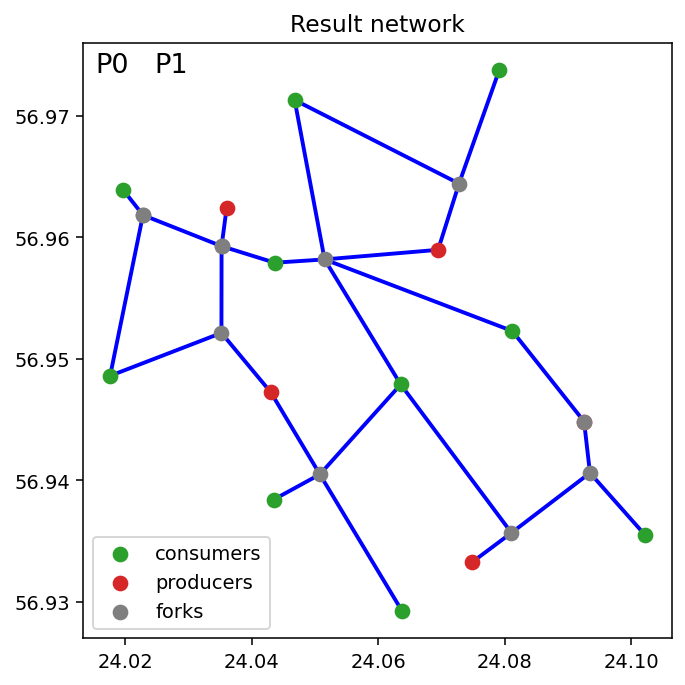

In [6]:
# plot invested edges
plt.rcParams['figure.figsize'] = (10, 8)   # <-- bigger
plt.rcParams['figure.dpi'] = 140

static_map_1 = dhnx.plotting.StaticMap(network)
static_map_1.draw(background_map=False)
ax = plt.gca()
ax.set_title('Result network')

# Scatter points
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)

# labels that DON'T expand the axis extent
plt.text(0.02, 0.95, 'P0', transform=ax.transAxes, fontsize=14)
plt.text(0.12, 0.95, 'P1', transform=ax.transAxes, fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

## 2.2 Investment optimization of the network

In [7]:
# Optimize the investment data
network.optimize_investment(invest_options=invest_opt,  solver='cbc')


ValueError: The consumer id 1 has no connection the the grid!

## 2.3 Results postprocessing and Plotting 


In [ ]:
# ####### Postprocessing and Plotting ###########
results_edges = network.results.optimization['components']['pipes']
print(results_edges[['from_node', 'to_node', 'hp_type', 'capacity',
                     'direction', 'costs', 'losses']])

results_edges.to_csv("STEP_2/Outputs/Optimum_network_base.csv", index=True)

print('Objective value: ', network.results.optimization['oemof_meta']['objective'])

# assign new ThermalNetwork with invested pipes
twn_results = network
twn_results.components['pipes'] = results_edges[results_edges['capacity'] > 0.001]



      from_node      to_node hp_type    capacity  direction         costs  \
id                                                                          
0   producers-0     forks-17   DN-50  4813.77080          1  3.067222e+06   
1      forks-17     forks-16   DN-50  4802.26880          1  3.402821e+06   
2      forks-16     forks-18   DN-50  3218.41120          1  7.139526e+06   
3      forks-18     forks-19   DN-50  3191.63790          1  1.597184e+07   
4      forks-19     forks-20   DN-50  2985.40310          1  1.599882e+07   
5      forks-20     forks-21   DN-50  2925.40750          1  1.547280e+07   
6      forks-21  consumers-3   DN-50  2867.38450          1  4.963587e+07   
7      forks-16     forks-15   DN-50  1571.09700          1  5.522356e+06   
8      forks-15     forks-14   DN-50  1550.38820          1  7.809660e+06   
9      forks-14     forks-13   DN-50  1521.10200          1  6.396968e+06   
10     forks-13     forks-12   DN-50  1497.11330          1  6.859846e+06   

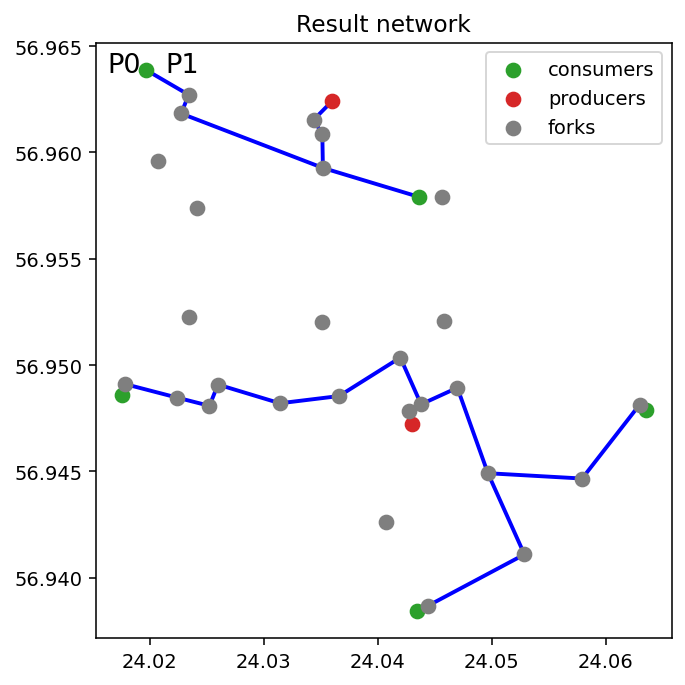

In [ ]:
# plot invested edges
plt.rcParams['figure.figsize'] = (10, 8)   # <-- bigger
plt.rcParams['figure.dpi'] = 140

static_map_2 = dhnx.plotting.StaticMap(twn_results)
static_map_2.draw(background_map=False)
ax = plt.gca()
ax.set_title('Result network')

# Scatter points
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)

# labels that DON'T expand the axis extent
plt.text(0.02, 0.95, 'P0', transform=ax.transAxes, fontsize=14)
plt.text(0.12, 0.95, 'P1', transform=ax.transAxes, fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()